**Exploratory Data Analysis (EDA): A Project on Loan App** 

**Introduction**

Loan approvals can be determined by several factors, but what exactly is the main factor that affects how much a person gets? This project explores the relationship between different variables and loan amount, including variables such as monthly income, applicant income, and purchase price.

The goal is to understand which factors have the most impact on loan amount. To do this, we use descriptive statistics, visual exploration, statistical testing, and a regression model to examine how different variables relate to loan amount. The project also includes checking if the regression model meets the basic assumptions so that the results can be trusted. The findings can help lenders make more informed decisions and better manage financial risk.

**Load the data and check for information on the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
#load the data
df = pd.read_csv("loanapp.csv")
df.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,True,white,reject,1,128,74,1.0,1.0,False,4583,160.0,52.0,2,2,False,2,male
1,False,white,approve,1,128,84,1.0,0.0,False,2666,143.0,37.0,2,2,False,2,male
2,True,white,approve,1,66,36,1.0,0.0,True,3000,110.0,19.0,2,6,True,2,male
3,True,white,approve,1,120,59,1.0,0.0,False,2583,134.0,31.0,2,1,False,1,male
4,False,white,approve,1,111,63,1.0,0.0,False,2208,138.0,169.0,2,6,False,2,male


In [2]:
# checking information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   married                  1985 non-null   object 
 1   race                     1988 non-null   object 
 2   loan_decision            1988 non-null   object 
 3   occupancy                1988 non-null   int64  
 4   loan_amount              1988 non-null   int64  
 5   applicant_income         1988 non-null   int64  
 6   num_units                1984 non-null   float64
 7   num_dependants           1985 non-null   float64
 8   self_employed            1988 non-null   bool   
 9   monthly_income           1988 non-null   int64  
 10  purchase_price           1988 non-null   float64
 11  liquid_assets            1988 non-null   float64
 12  mortage_payment_history  1988 non-null   int64  
 13  consumer_credit_history  1988 non-null   int64  
 14  filed_bankruptcy        

**QUESTION 1: Generate descriptive statistics for the dataset**

In [3]:
#get the descriptive stats
df.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,1988.000000,1988.000000,1988.000000,1984.000000,1985.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,1.031690,143.272636,84.684105,1.122480,0.771285,5195.220825,196.304088,4620.333873,1.708249,2.110161,1.861167
std,0.191678,80.531470,87.079777,0.437315,1.104464,5270.360946,128.136030,67142.936043,0.555335,1.663256,0.535448
min,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,100.000000,48.000000,1.000000,0.000000,2875.750000,129.000000,20.000000,1.000000,1.000000,2.000000
50%,1.000000,126.000000,64.000000,1.000000,0.000000,3812.500000,163.000000,38.000000,2.000000,1.000000,2.000000
75%,1.000000,165.000000,88.000000,1.000000,1.000000,5594.500000,225.000000,83.000000,2.000000,2.000000,2.000000
max,3.000000,980.000000,972.000000,4.000000,8.000000,81000.000000,1535.000000,1000000.000000,4.000000,6.000000,3.000000


*This shows me a summary of the numerical columns of the dataset such as the mean, median, and standard deviation. It helps in understanding the distribution and spread of the variables like loan amount, applicant income, and monthly income. These basic statistics give an overview of the data and help spot any unusual values early.*

**QUESTION 2: Check any records with missing values and handle the missing data as appropriate**

In [4]:
# checking for missing values
df.isnull().sum()

married                     3
race                        0
loan_decision               0
occupancy                   0
loan_amount                 0
applicant_income            0
num_units                   4
num_dependants              3
self_employed               0
monthly_income              0
purchase_price              0
liquid_assets               0
mortage_payment_history     0
consumer_credit_history     0
filed_bankruptcy            0
property_type               0
gender                     14
dtype: int64

*there are missing values in 'married', 'num_units', 'num_dependants', and 'gender'*

In [5]:
#handling the missing values by deleting them
df.dropna(inplace=True, axis="rows")

In [6]:
#check if the missing values are handled as appropriate
df.isnull().sum()

married                    0
race                       0
loan_decision              0
occupancy                  0
loan_amount                0
applicant_income           0
num_units                  0
num_dependants             0
self_employed              0
monthly_income             0
purchase_price             0
liquid_assets              0
mortage_payment_history    0
consumer_credit_history    0
filed_bankruptcy           0
property_type              0
gender                     0
dtype: int64

*the missing values have been handled as appropriate*

**QUESTION 3: Building of graphs to visualize the variables**

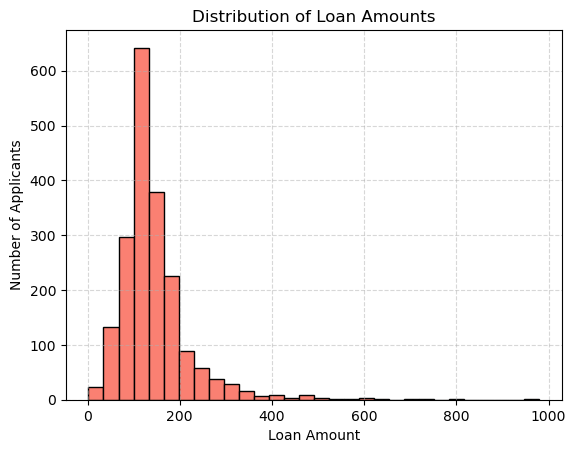

In [7]:
#3A. Visualizing the distribution of one or more individual continuous variables
#plotting the loan amount distribution displayed by histogram and using Matplotlib
plt.hist(df['loan_amount'], bins=30, align='mid', color='salmon', edgecolor='black')
# Add x/y labels
plt.xlabel("Loan Amount")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Loan Amounts")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*The histogram graph above shows how the loan amounts are spread out. Most applicants got loans between 50 and 300, while fewer people got really high amounts. The distribution is uneven, with a few applicants receiving much larger loans*

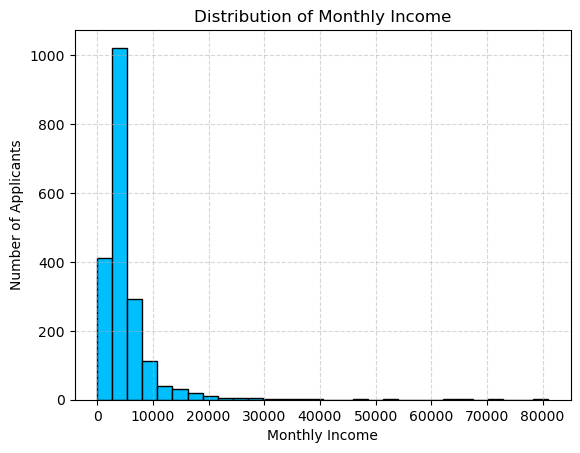

In [8]:
# Distribution of monthly income
plt.hist(df["monthly_income"], bins=30, color='deepskyblue', edgecolor='black')
plt.xlabel("Monthly Income")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Monthly Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*This shows how monthly income is spread across applicants. Most people have lower monthly incomes, and only a few have very high ones.*

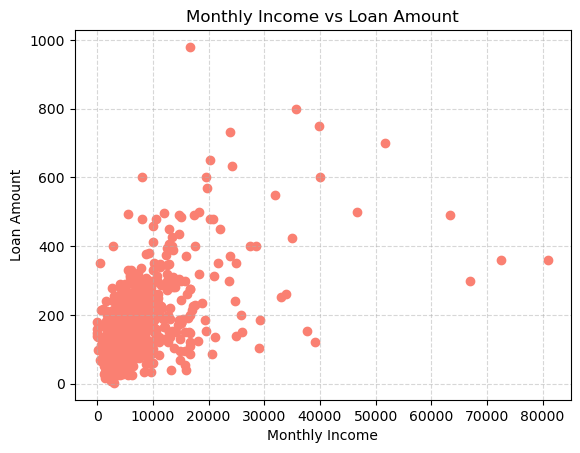

In [9]:
#3B. visualizing the relationship of a pair of continuous variables displayed by a scatter plot
#Scatter Plot of Monthly Income vs. Loan Amount
plt.scatter(df['monthly_income'], df['loan_amount'], color='salmon', alpha=1.0)
plt.xlabel("Monthly Income")
plt.ylabel("Loan Amount")
plt.title("Monthly Income vs Loan Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*This scatter plot above shows how monthly income relates to loan amounts. The points are mostly clustered at lower income levels, meaning most applicants have lower monthly incomes. There are a few high-income applicants, but they don’t always receive bigger loans. The scatter plot shows that income alone might not determine loan amounts. There are likely other variables, like purchase price or credit history, that influence loan decisions alongside income.*

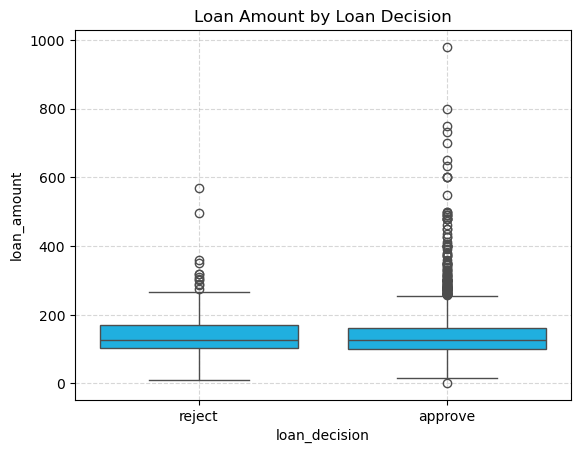

In [10]:
#3C. visualizing the association b/w a categorical variable and a continuous one
#Box plot of loan decision by loan amount
sns.boxplot(x='loan_decision', y='loan_amount', data=df, color='deepskyblue')
plt.title("Loan Amount by Loan Decision")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*The box plot above compares loan amounts for approved and rejected applications. The median loan amount is similar for both groups but approved loans have more values with some very high amounts. This shows that some approved applicants receive much larger loans, while rejected loans are mostly lower and closer together*

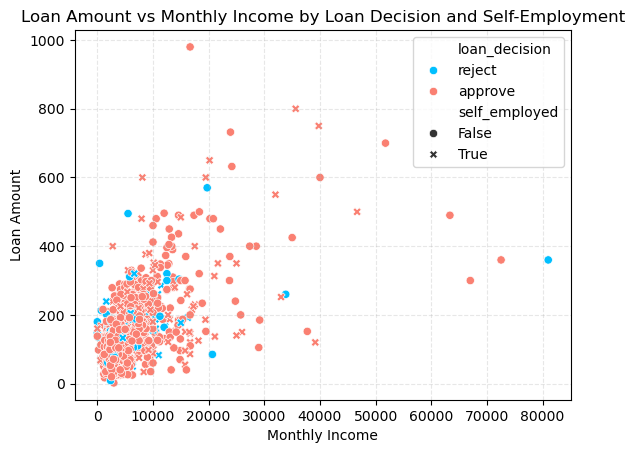

In [11]:
#3D. visualizing the relationship between more than two variables, e.g., using semantic mappings
#Scatter plot showing loan amount vs monthly income by loan decision and self emploment
sns.scatterplot(
    data=df,
    x='monthly_income',
    y='loan_amount',
    hue='loan_decision',
    style='self_employed',
    palette={'approve': 'salmon', 'reject': 'deepskyblue'},
)
plt.xlabel("Monthly Income")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Monthly Income by Loan Decision and Self-Employment")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*This scatter plot shows how loan amounts relate to monthly income, with extra details added using color and shape. The color shows whether the loan was approved or rejected, and the shape shows if the applicant is self-employed.*


**QUESTION 4: Display unique values of a categorical variable and their frequencies.**

In [12]:
#Display Unique Values and Their Frequencies for race
df['race'].value_counts()

race
white     1666
black      195
hispan     108
Name: count, dtype: int64

*This shows the majority of applicants in the dataset are white followed by black then hispanic.*

**QUESTION 5: Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them and interpret the results.**

In [13]:
#creating a contingency table between loan decisions and race
cont_table = pd.crosstab(df['race'], df['loan_decision'])

In [14]:
#print the contingency table
cont_table

loan_decision,approve,reject
race,,
black,131,64
hispan,82,26
white,1514,152


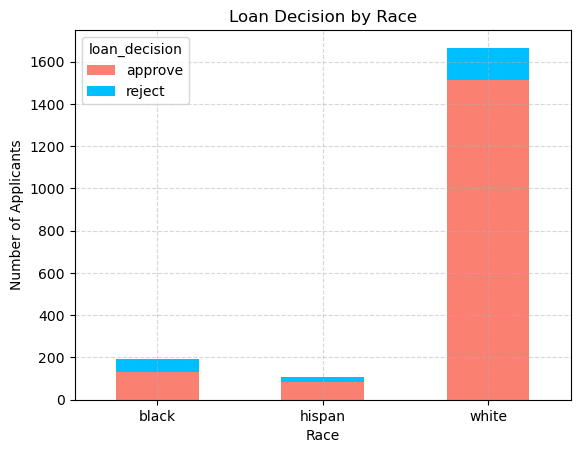

In [15]:
# creating a bar plot for the contingency table to visually represents the relationship between `loan_decision` and `race'
cont_table.plot(kind="bar", stacked=True, rot=0, color=['salmon', 'deepskyblue'])
plt.title("Loan Decision by Race")
plt.xlabel("Race")
plt.ylabel("Number of Applicants")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*The bar graph above shows the loan decisions approved and rejected in accordance to the applicant's race. From the graph, it is clear that more loans were approved for white applicants compared to other applicants.*

In [16]:
#performing the chi square test
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 1.1422552252120337e-23


*The Chi-Square test was performed to check if there is a dependence between loan decisions and race. The p-value is much smaller than the significant level 0.05, so we reject the null hypothesis.
This means there is a significant relationship between loan decision and race.*

**QUESTION 6:Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).** 

In [17]:
#Retrieve a Subset Based on Multiple criteria
# Filter self-employed + approved loans
subset = df[(df['loan_decision'] == 'approve') & (df['self_employed'] == True)]

In [18]:
# Display descriptive statistics for the subset
subset.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1.064516,176.152074,114.225806,1.152074,0.889401,7949.599078,255.818604,13974.293041,1.645161,1.801843,1.898618
std,0.246238,115.485609,106.677385,0.526965,1.141283,7111.242789,196.211012,117016.237732,0.672466,1.398543,0.534762
min,1.000000,25.000000,19.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,110.000000,60.000000,1.000000,0.000000,3500.000000,150.000000,31.000000,1.000000,1.000000,2.000000
50%,1.000000,150.000000,84.000000,1.000000,0.000000,5800.000000,200.500000,66.000000,2.000000,1.000000,2.000000
75%,1.000000,188.000000,120.000000,1.000000,2.000000,9200.000000,287.000000,160.000000,2.000000,2.000000,2.000000
max,2.000000,800.000000,666.000000,4.000000,5.000000,46667.000000,1450.000000,1000000.000000,4.000000,6.000000,3.000000


*Self-employed applicants who were approved tend to have a higher average loan amount and monthly income compared to the rest of the dataset. This might suggest that when self-employed applicants do get approved, they are usually stronger financial candidates or applying for more expensive properties. It also shows that while self-employed people might face stricter screening, the ones who are approved may receive larger loans on average*

**QUESTION 7: Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.**

In [19]:
# Step 7: Compare mean monthly income of approved vs rejected applicants

# Create the groups
group_approve = df[df['loan_decision'] == 'approve']['monthly_income']
group_reject = df[df['loan_decision'] == 'reject']['monthly_income']

# Print means with labels
print("Mean Monthly Income (Approved):", group_approve.mean())
print("Mean Monthly Income (Rejected):", group_reject.mean())

Mean Monthly Income (Approved): 5256.380428488709
Mean Monthly Income (Rejected): 4837.01652892562


In [20]:
#Perform T-Test
t_stat, p_val = stats.ttest_ind(group_approve, group_reject)

#print results
print(f"t-value: {t_stat}, p-value: {p_val}")

t-value: 1.1548741531963007, p-value: 0.24828224204569163


*The p-value is greater than 0.05, so we do not reject the null hypothesis.
This means there is no difference in monthly income between approved and rejected applicants.This also shows that income level by itself does not explain approval decisions. Lenders may be looking at other financial indicators or application factors that go beyond just monthly income.*

**QUESTION 8: Create one or more tables that group the data by a certain categorical variable and display summarized information for each group (e.g., the mean or sum within the group).**

In [21]:
# summary of loan amount and income stats by loan decision
summary = df.groupby('loan_decision')[['loan_amount', 'monthly_income', 'applicant_income']].agg(['mean', 'median', 'std'])
summary

loan_amount                   monthly_income          \
                     mean median        std           mean  median   
loan_decision                                                        
approve        143.777649  126.0  82.318457    5256.380428  3844.0   
reject         141.561983  127.0  69.141372    4837.016529  3595.0   

                           applicant_income                     
                       std             mean median         std  
loan_decision                                                   
approve        5177.524501        84.101911   65.0   81.012624  
reject         6037.329844        90.661157   58.5  124.066476

*The table above shows the average(mean), median, and spread (std) for loan amount and income variables
Approved applicants have slightly higher average loan amounts and monthly incomes compared to rejected applicants. The differences are small, but the variation in income is higher among rejected applicants.*

**QUESTION 9:  Implement a linear regression model and interpret its output including its accuracy**

In [22]:
# Define independent (X) and dependent (Y) variables
X = df[['applicant_income', 'monthly_income', 'purchase_price']]
y = df['loan_amount']

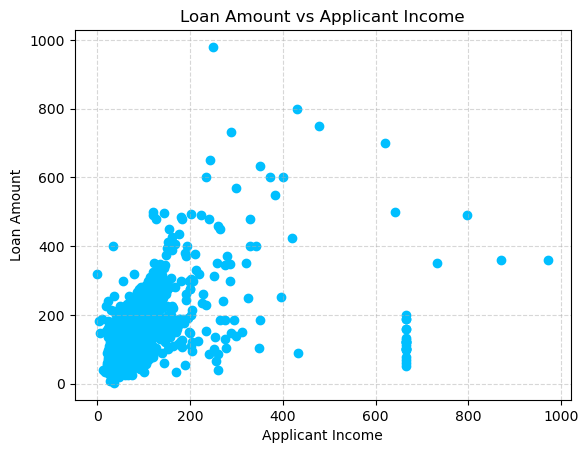

In [23]:
# Scatter plots to show relationships

# Applicant Income vs Loan Amount
plt.scatter(df['applicant_income'], df['loan_amount'], color='deepskyblue')
plt.title("Loan Amount vs Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

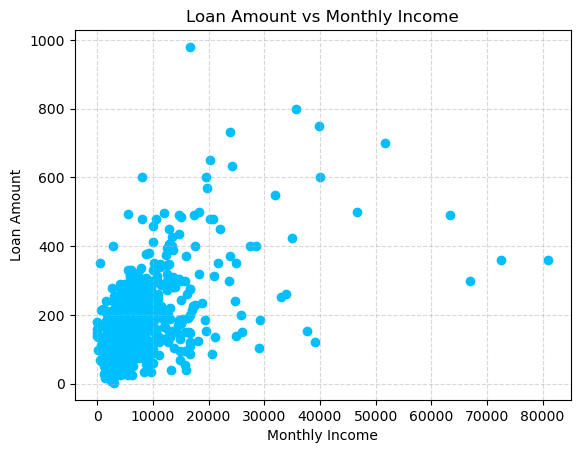

In [24]:
# Monthly Income vs Loan Amount
plt.scatter(df['monthly_income'], df['loan_amount'], color='deepskyblue')
plt.title("Loan Amount vs Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Loan Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

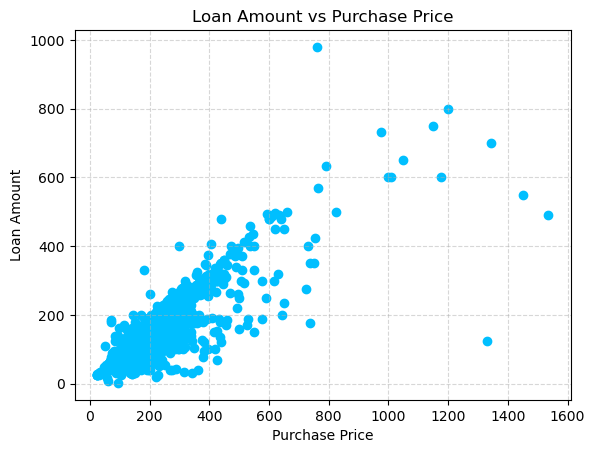

In [25]:
# Purchase Price vs Loan Amount
plt.scatter(df['purchase_price'], df['loan_amount'], color='deepskyblue')
plt.title("Loan Amount vs Purchase Price")
plt.xlabel("Purchase Price")
plt.ylabel("Loan Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*The scatterplots show that monthly income, applicant income, and purchase price all have a positive relationship with loan amount. This supports the use of these variables in the regression model.*

In [26]:
# Build the regression model using applicant income, monthly income, and purchase price as predictors
model = sm.OLS.from_formula("loan_amount ~ applicant_income + monthly_income + purchase_price", data=df).fit()

In [27]:
#Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1546.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:01:32   Log-Likelihood:                -10248.
No. Observations:                1969   AIC:                         2.050e+04
Df Residuals:                    1965   BIC:                         2.053e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           39.0811      1.848     21.153      0.000      35.458      42.704
applicant_income     0.0455      0.014      3.265      0.001       0.018       0.073
monthly_income       0.0010      0.000      3.664      0.000       0.000       0.001
purchase_price       0.4855      0.010     48.455      0.000       0.466       0.505
==============================================================================
Omnibus:                      763.117   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80164.594
Skew:                          -0.834   Prob(JB):                         0.00
Kurtosis:                      34.214   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*This model predicts loan amount using applicant income, monthly income, and purchase price.
The R-squared value is 0.702, which means the model explains about 70% of the variation in loan amount.* 

*All coefficients are positive which means all predictors increase loan amount.*

*For each 1-unit increase in purchase price, the loan amount increases by about 0.49 units, assuming other variables stay the same.*

*For each 1-unit increase in monthly income, the loan amount increases by about 0.001 units.*

*For each 1-unit increase in applicant income, the loan amount increases by about 0.045 units.*

*p-values are all less than significance level 0.05 which means all three variables are important in the model.*

*The regression results also show that all variables are positively related to loan amount, which matches expectations. For instance, people with higher purchase prices or income levels generally qualify for larger loans. The relatively low coefficient for monthly income might be because it overlaps with applicant income, or because lenders focus more on total income rather than just monthly figures.*

*this shows that the model fits the data well and can be used to estimate loan amounts based on these inputs.**

**Checking the assumptions of Linear Regression**

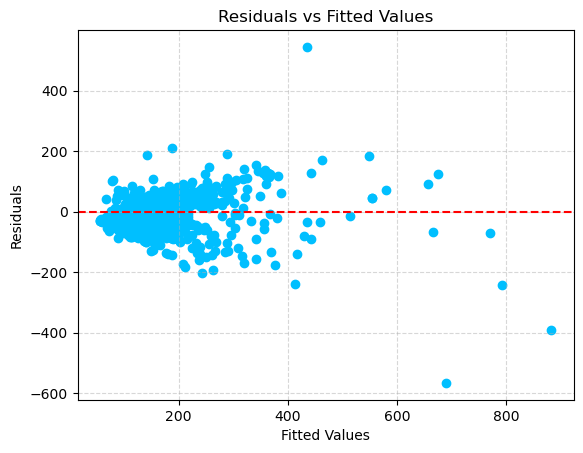

In [28]:
# Residuals and Fitted values
residuals = model.resid
fitted = model.fittedvalues

# 1. Residuals vs Fitted (linearity & homoscedasticity)
plt.scatter(fitted, residuals, color='deepskyblue')

# Add a horizontal line at zero to check if residuals are centered around zero
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

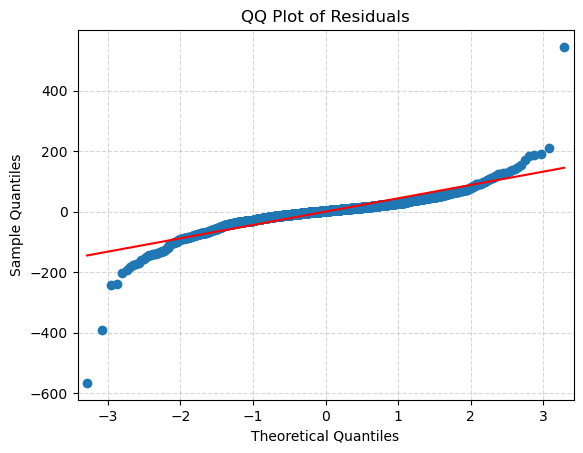

In [29]:
# 2. QQ Plot (normality of residuals)
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*The residual plot shows the errors that are spread around zero, which supports linearity and means the model works fine for this data. A QQ plot was used instead of a histogram because it shows more clearly if the residuals are normal. The QQ plot shows the points mostly follow the line, so the errors are close to normal. Both plots suggest that the model meets the basic requirements of linear regression. The Durbin-Watson value was close to 2, which supports the assumption that errors are independent. Together with the residual and QQ plots, this adds more confidence that the model meets the key assumptions of linear regression.*

**Conclusion**

This project explored the factors that influence loan amount using data analysis and a linear regression model. Based on the results and the assumption checks, the model is reasonable and can be used to estimate loan amounts using the variables in the dataset.


**Key Findings**

-Purchase price, monthly income, and applicant income all have a positive relationship with loan amount.

-Purchase price had the strongest effect on loan amount, followed by monthly income and applicant income.

-The final model explained about 70% of the variation in loan amount, which shows that the model fits the data well.

-All the variables in the model were important based on their p-values.

-The model assumptions were tested using a residual plot and a QQ plot, and the results showed that the model meets the basic requirements of linear regression.


**Suggestions**

-If more data was available, variables such as credit score or loan type could make the model even better.

-It could also be useful to build a model that predicts whether a loan would be approved or not, not just the amount.

**Limitation:** 

One limitation is that the model may be affected by multicollinearity. The condition number shown in the regression output was quite high, which could mean that some variables are too closely related. This can affect the reliability of the coefficient values, even if the model fits well overall.

**Comment**

Doing this project helped me understand how real-world decisions like loan approvals are influenced by multiple factors. It also showed how data can be used to build useful models that support decision-making, especially in financial or business settings. This project also showed how important it is to check model assumptions and not just rely on numbers. Even though the model had a good fit, visual checks helped confirm that the results were reliable.